In [3]:
# LINEAR REGRESSION 1
import numpy as np
import matplotlib.pyplot as plt

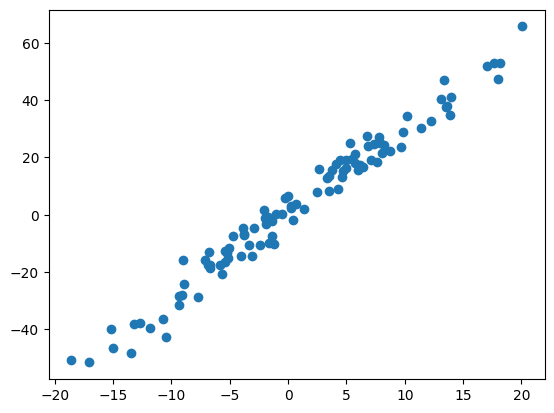

In [67]:
# CODE-1
#Data Generation
def GenerateDataSet(m):
  X=np.random.randn(m)*10
  noise = np.random.randn(m)
  y=3*X+1+5*noise
  return X,y
m=100
X,y=GenerateDataSet(100)
plt.scatter(X,y)

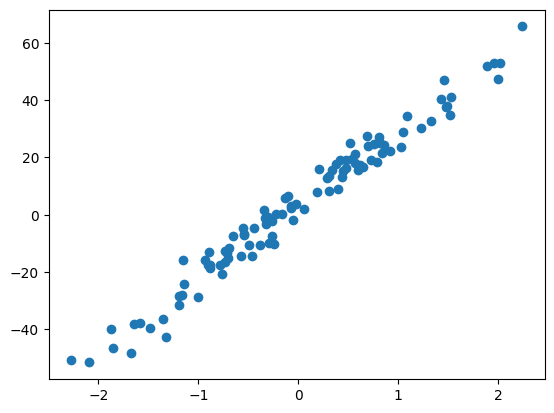

In [68]:
# CODE -2
# Data Normalisation
def NormaliseData(X):
  X=(X-X.mean())/X.std();
  return X;
X=NormaliseData(X)
plt.scatter(X,y)

Text(0.5, 1.0, 'Train-Test Data')

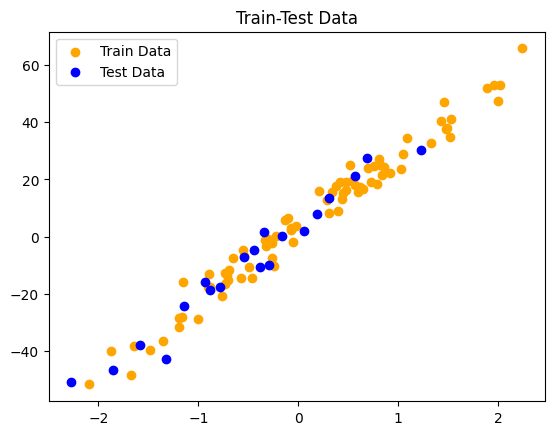

In [69]:
# CODE -3
# Train & Test Split

def trainTestSplit(X,y,split=0.8):
  m=X.shape[0]
  data=np.zeros((m,2))
  data[:,0]=X
  data[:,1]=y

  np.random.shuffle(data)
  split=int(m*split)
  XT=data[:split,0]
  yT=data[:split,1]
  Xt=data[split:,0]
  yt=data[split:,1]
  return XT,yT,Xt,yt
XT,yT,Xt,yt=trainTestSplit(X,y)


plt.scatter(XT,yT , color='orange',label='Train Data')
plt.scatter(Xt,yt, color='blue',label='Test Data')
plt.legend()
plt.title("Train-Test Data")


[ 3.4236606  25.40460098]


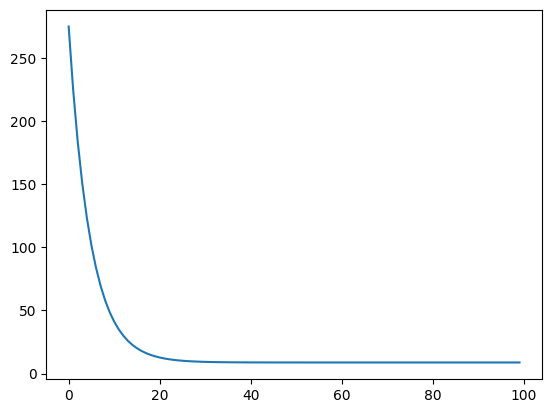

In [70]:
#CODE -4
# Modelling

# Hypothesis Function
def  Hypothesis(X,theta):
  return theta[0] + theta[1]*X

#error Function
def error(X,y,theta):
  m=X.shape[0]
  e=0;
  for i in range(m) :
    y_i= Hypothesis(X[i],theta)
    e+=(y_i-y[i])**2
  return e/(2*m)

#gradient
def gradient(X,y,theta):
  m=X.shape[0]
  grad=np.zeros((2,))
  for i in range(m):
    y_i=Hypothesis(X[i],theta)
    grad[0]+=(y_i-y[i])
    grad[1]+=(y_i-y[i])*X[i]
  return grad/m


#Training Model
def Train(X,y,learning_rate=0.1 , maxItrs=100):
  theta = np.zeros((2,))
  error_list=[]
  for i in range (maxItrs):
    grad = gradient(X,y,theta)
    theta[0]=theta[0]-learning_rate*grad[0]
    theta[1]=theta[1]-learning_rate*grad[1]
    e=error(X,y,theta)
    error_list.append(e)

  plt.plot(error_list)
  return theta
theta=Train(X,y)
print(theta)

Text(0.5, 1.0, 'Test-Prediction Data')

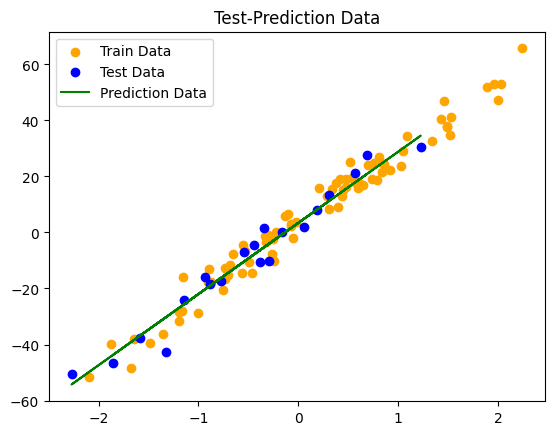

In [72]:
#CODE -5
# Prediction
def predict(X,theta):
  # basically this is also hypothesis function
  return Hypothesis(X,theta)

yp=predict(Xt,theta)
plt.scatter(XT,yT, color='orange',label='Train Data')
plt.scatter(Xt,yt, color='blue',label='Test Data')
plt.plot(Xt,yp, color='green',label='Prediction Data')
plt.legend()
plt.title("Test-Prediction Data")


In [73]:
# CODE -6
# R2 Score - Model Evaluation

def r2score(y ,yp):
  num = np.sum((y-yp)**2)
  deno= np.sum((y-y.mean())**2)
  return 1-(num/deno)

print(r2score(yt,yp))

0.9604947464791879
